In [1]:
import spynnaker8 as p
import pyNN.spiNNaker as sim
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
%matplotlib inline

In [2]:
start_time = time.time()
sim.setup(timestep = 0.1)
TotalDuration = 1000.0
time_resol = 0.1
TimeInt = 1.0 / time_resol
TotalDataPoints = int(TotalDuration * TimeInt)
rate_Poisson_Inp_base = 25

2021-06-12 09:20:56 INFO: Read cfg files: /home/spinnaker/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/spinnaker/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/spinnaker/.spynnaker.cfg
2021-06-12 09:20:56 INFO: Will search these locations for binaries: /home/spinnaker/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/spinnaker/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2021-06-12 09:20:56 WARNING: /home/spinnaker/work/reports has 45 old reports that have not been closed
2021-06-12 09:20:56 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2021-06-12 09:20:56 INFO: Setting time scale factor to 10.
2021-06-12 09:20:56 INFO: Setting machine time step to 100 micro-seconds.


['/home/spinnaker/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/spinnaker/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/spinnaker/.spynnaker.cfg']


In [3]:
NumCells_exc = 80
NumCells_inh = 20
NumCells_extSource = 80

In [4]:
# Synaptic Conn params
conn_delay = 1.0
conn_weights = 5.0
conn_prob = 0.2

In [5]:
# excitatory cell params
exc_a_tonic = 0.02
exc_b_tonic = 0.2
exc_c_tonic = -65.0
exc_d_tonic = 6.0
exc_v_init_tonic = -65.0
exc_u_init_tonic = exc_b_tonic * exc_v_init_tonic

In [6]:
# inhibitory cell params
inh_a_tonic = 0.1
inh_b_tonic = 0.2
inh_c_tonic = -65.0
inh_d_tonic = 6.0
inh_v_init_tonic = -70.0
inh_u_init = inh_b_tonic * inh_v_init_tonic

In [7]:
# Time constants
tau_exc = 1.7

tau_inh = 2.5

In [8]:
# DC bias current
current_Pulse = 0.0
exc_cell_params = {
'a': exc_a_tonic, 'b': exc_b_tonic, 
'c': exc_c_tonic, 'd': exc_d_tonic,
#'v_init': exc_v_init_tonic, 'u_init': exc_u_init_tonic,
'tau_syn_E': tau_exc, 'tau_syn_I': tau_inh,
'i_offset': current_Pulse
               }

inh_cell_params = {
    'a' : inh_a_tonic, 'b': inh_b_tonic,
    
    'c': inh_c_tonic, 'd': inh_d_tonic,
    #'v_init' : inh_v_init_tonic,'u_init' : inh_u_init,
    'tau_syn_E' : tau_exc, 'tau_syn_I':tau_inh,
    'i_offset' : current_Pulse
               }

In [9]:
external_spike_source_pop = p.Population(NumCells_extSource,p.SpikeSourcePoisson,{'rate': rate_Poisson_Inp_base,'duration': 1000,'start': 100},label='spike_source_poisson')
exc_pop = p.Population(NumCells_exc, p.Izhikevich(**exc_cell_params), label='exc_pop')
inh_pop = p.Population(NumCells_inh, p.Izhikevich(**inh_cell_params), label='inh_pop')

In [10]:
#external to excitatory
Proj00 = p.Projection(external_spike_source_pop, exc_pop, p.FixedProbabilityConnector(p_connect=0.5),p.StaticSynapse(weight=conn_weights, delay=conn_delay), receptor_type='excitatory')

#external to inhibitory
Proj01 = p.Projection(external_spike_source_pop, inh_pop, p.FixedProbabilityConnector(p_connect=0.5),p.StaticSynapse(weight=conn_weights, delay=conn_delay), receptor_type='excitatory')

#excitatory to inhibitory
Proj02 = p.Projection(exc_pop, inh_pop, p.FixedProbabilityConnector(p_connect=conn_prob),p.StaticSynapse(weight=conn_weights, delay=conn_delay), receptor_type='excitatory')

#inhibitory to excitatory
Proj03 = p.Projection(inh_pop, exc_pop, p.FixedProbabilityConnector(p_connect=conn_prob),p.StaticSynapse(weight=conn_weights, delay=conn_delay), receptor_type='inhibitory')

#inhibitory to inhibitory
Proj04 = p.Projection(inh_pop, inh_pop, p.FixedProbabilityConnector(p_connect=conn_prob),p.StaticSynapse(weight=conn_weights, delay=conn_delay), receptor_type='inhibitory')

#excitatory to excitatory

Proj05 = p.Projection(exc_pop, exc_pop, p.FixedProbabilityConnector(p_connect=conn_prob),p.StaticSynapse(weight=conn_weights, delay=conn_delay), receptor_type='excitatory')



In [11]:
external_spike_source_pop.record("spikes") #need to store external spike source records and need to print them
exc_pop.record(("spikes", "v"))
inh_pop.record(("spikes", "v"))
p.run(TotalDuration)
external_spike_source = external_spike_source_pop.spinnaker_get_data("spikes")
exc_spikes = exc_pop.spinnaker_get_data("spikes")
inh_spikes = inh_pop.spinnaker_get_data("spikes")
exc_voltage = exc_pop.spinnaker_get_data("v")
inh_voltage = inh_pop.spinnaker_get_data("v")

2021-06-12 09:20:56 INFO: Starting execution process
2021-06-12 09:20:56 INFO: Simulating for 10000 0.1ms timesteps using a hardware timestep of 10us
2021-06-12 09:20:59 INFO: Time 0:00:03.074053 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2021-06-12 09:21:07 INFO: Time 0:00:08.253836 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2021-06-12 09:21:12 INFO: Time 0:00:04.809523 taken by PartitionAndPlacePartitioner
Created spalloc job 6012030
2021-06-12 09:21:12 INFO: Created spalloc job 6012030
Waiting for board power commands to complete.
2021-06-12 09:21:12 INFO: Waiting for board power commands to complete.
2021-06-12 09:21:17 INFO: Time 0:00:05.046062 taken by SpallocAllocator
2021-06-12 0

Getting profile data
|0%                          50%                         100%|
2021-06-12 09:22:11 INFO: Time 0:00:00.030294 taken by ProfileDataGatherer
2021-06-12 09:22:11 WARNING: spinnaker_get_data is non-standard PyNN and therefore may not be portable to other simulators. Nor do we guarantee that this function will exist in future releases.
Getting spikes for spike_source_poisson
|0%                          50%                         100%|
Getting spikes for exc_pop
|0%                          50%                         100%|
Getting spikes for inh_pop
|0%                          50%                         100%|
Getting v for exc_pop
|0%                          50%                         100%|
Getting v for inh_pop
|0%                          50%                         100%|


In [12]:
#print(exc_spikes) #print length of source spike data
print(len(exc_spikes))
#print(inh_spikes)
print(len(inh_spikes))
print(len(external_spike_source))
print(inh_spikes)

4233
2181
1769
[[  0.  106.2]
 [  0.  107.6]
 [  0.  108.6]
 ...
 [ 19.  953.6]
 [ 19.  977.6]
 [ 19.  997.9]]


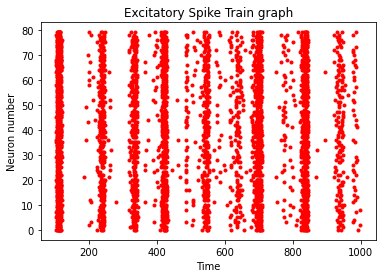

In [13]:
#print(exc_spikes)
plt.figure(1)
plt.xlabel('Time')
plt.ylabel('Neuron number')
plt.title('Excitatory Spike Train graph')
plt.plot(exc_spikes[:, 1], exc_spikes[:, 0], '.',color ='red')
#need to put x and y axis names 
#need to plot graphs for inhibitory and external source

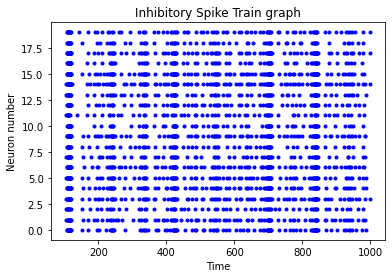

In [14]:
plt.figure(2)
plt.xlabel('Time')
plt.ylabel('Neuron number')
plt.title('Inhibitory Spike Train graph')
plt.plot(inh_spikes[:, 1], inh_spikes[:, 0], '.',color = 'blue')
#plt.savefig('inhibitory.png')

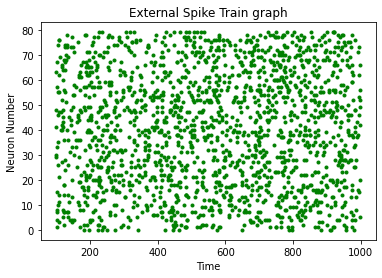

In [15]:
plt.figure(3)
plt.xlabel('Time')
plt.ylabel('Neuron Number')
plt.title('External Spike Train graph')
plt.plot(external_spike_source[:, 1], external_spike_source[:, 0], '.',color = 'green')


[[-70.         -69.99578857 -69.99194336 ... -76.39483643 -76.16244507
  -75.99551392]
 [-70.         -69.99578857 -69.99194336 ... -64.92431641 -64.24450684
  -63.65356445]
 [-70.         -69.99578857 -69.99194336 ... -65.33190918 -65.54998779
  -65.82266235]
 ...
 [-70.         -69.99578857 -69.99194336 ... -59.24987793 -58.93179321
  -58.65847778]
 [-70.         -69.99578857 -69.99194336 ... -62.58065796 -62.37390137
  -62.23291016]
 [-70.         -69.99578857 -69.99194336 ... -60.34494019 -60.26992798
  -60.26602173]]


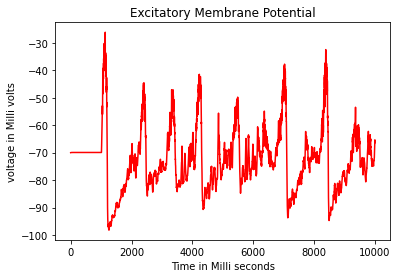

In [19]:
#print(exc_voltage)
#print(len(exc_voltage))
exc_mem_voltage = np.reshape(exc_voltage[:, 2], [NumCells_exc, TotalDataPoints])
print(exc_mem_voltage)
avgsignaltcr = np.mean(exc_mem_voltage, axis=0)
plt.figure(5)
plt.title('Excitatory Membrane Potential')
plt.xlabel('Time in Milli seconds')
plt.ylabel('voltage in Milli volts')
plt.plot([x for x in range(TotalDataPoints)], avgsignaltcr,color = 'red')
#plt.plot(exc_mem_voltage[:, 1], exc_mem_voltage[:, 2],)

[[-70.         -69.99578857 -69.99194336 ... -59.52389526 -58.80383301
  -58.13330078]
 [-70.         -69.99578857 -69.99194336 ... -61.63946533 -61.25073242
  -60.90908813]
 [-70.         -69.99578857 -69.99194336 ... -19.93463135 -11.00796509
    2.23388672]
 ...
 [-70.         -69.99578857 -69.99194336 ... -65.         -64.41720581
  -64.18084717]
 [-70.         -69.99578857 -69.99194336 ... -60.08612061 -59.74108887
  -59.42886353]
 [-70.         -69.99578857 -69.99194336 ... -63.21514893 -63.4624939
  -63.74349976]]


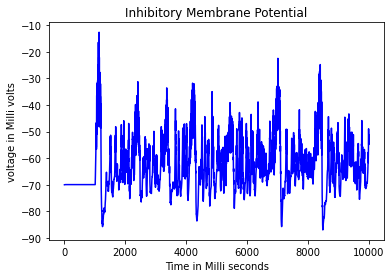

In [20]:
inh_mem_voltage = np.reshape(inh_voltage[:, 2], [NumCells_inh, TotalDataPoints])
print(inh_mem_voltage)
avgsignaltcr1 = np.mean(inh_mem_voltage, axis=0)
plt.figure(6)
plt.title('Inhibitory Membrane Potential')
plt.xlabel('Time in Milli seconds')
plt.ylabel('voltage in Milli volts')
plt.plot([x for x in range(TotalDataPoints)], avgsignaltcr1,color = 'blue')
plt.savefig('inhibitory_voltage.png')